# Module : 3

## **Fundamental analysis using Regression**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3.1

**Import the file 'gold.csv', which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.**

In [0]:
gold_df = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/GOLD.csv")

In [3]:
gold_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
gold_df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,NaN,429.924911


In [5]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      512 non-null    object 
 1   Price     512 non-null    int64  
 2   Open      512 non-null    int64  
 3   High      512 non-null    int64  
 4   Low       512 non-null    int64  
 5   Vol.      512 non-null    object 
 6   Change %  512 non-null    object 
 7   Pred      411 non-null    float64
 8   new       512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [0]:
gold_df.set_index('Date', inplace=True)

**Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.**

In [0]:
df_train = gold_df[-np.isnan(gold_df['Pred'])]
df_test = gold_df[np.isnan(gold_df['Pred'])]

In [8]:
df_train.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [9]:
df_train.shape

(411, 8)

In [10]:
df_test.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976


In [11]:
df_test.shape

(101, 8)

**Linear Regession on "Pred"**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
X_fields = ['Price','Open','High','Low']

In [14]:
lr = LinearRegression()
lr.fit(df_train[['Price', 'Open', 'High', 'Low']], df_train['Pred'])
print(lr.score(df_train[['Price', 'Open', 'High', 'Low']], df_train['Pred']))

1.0


In [15]:
lr.coef_

array([ 2.,  3., -1., -4.])

In [16]:
lr.intercept_

-2.6716406864579767e-12

In [17]:
df_test['Pred'] = lr.predict(df_test[['Price', 'Open', 'High', 'Low']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, Dec 11, 2018 to May 03, 2019
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     101 non-null    int64  
 1   Open      101 non-null    int64  
 2   High      101 non-null    int64  
 3   Low       101 non-null    int64  
 4   Vol.      101 non-null    object 
 5   Change %  101 non-null    object 
 6   Pred      101 non-null    float64
 7   new       101 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.1+ KB


**Plotting a histogram & distplot helps in recognizing the discrepencies in prediction**

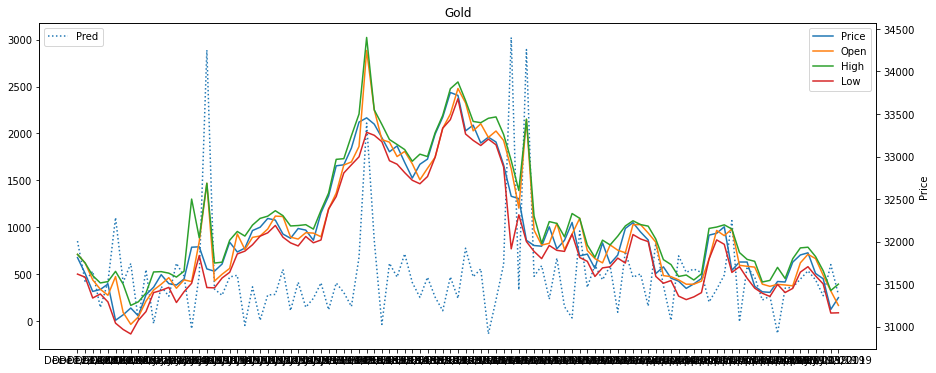

In [19]:
fig = plt.figure(figsize=[15, 6])
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax2.plot( df_test.Price, label='Price' ); 
ax2.plot( df_test.Open,  label='Open' );  
ax2.plot( df_test.High,  label='High' );  
ax2.plot( df_test.Low,   label='Low' );   
ax1.plot( df_test.Pred,  label='Pred', linestyle=':');  

plt.title('Gold')
plt.ylabel('Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

(array([20., 47., 24.,  6.,  0.,  0.,  0.,  1.,  0.,  3.]),
 array([-139. ,  177.3,  493.6,  809.9, 1126.2, 1442.5, 1758.8, 2075.1,
        2391.4, 2707.7, 3024. ]),
 <a list of 10 Patch objects>)

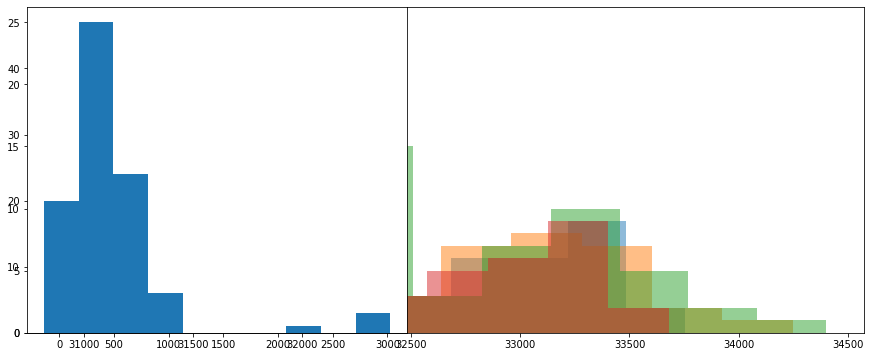

In [20]:
fig = plt.figure(figsize=[15, 6])
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(1, 2, 1)

ax1.hist( df_test.Price, alpha=0.5 )
ax1.hist( df_test.Open, alpha=0.5 )
ax1.hist( df_test.High, alpha=0.5 )
ax1.hist( df_test.Low, alpha=0.5 )
ax2.hist( df_test.Pred )

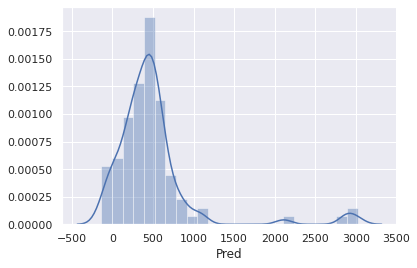

In [21]:
sns.set()
ax = sns.distplot(df_test.Pred)
plt.show()

**complete the entire column "Pred" of Gold_df.**

In [0]:
gold_df['Pred'] = lr.predict(gold_df[['Price', 'Open', 'High', 'Low']])

In [23]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, May 04, 2017 to May 03, 2019
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     512 non-null    int64  
 1   Open      512 non-null    int64  
 2   High      512 non-null    int64  
 3   Low       512 non-null    int64  
 4   Vol.      512 non-null    object 
 5   Change %  512 non-null    object 
 6   Pred      512 non-null    float64
 7   new       512 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 36.0+ KB


Linear Regession on "new"

In [24]:
lr_new = LinearRegression()
lr_new.fit(df_train[['Price', 'Open', 'High', 'Low']], df_train['new'])
print(lr_new.score(df_train[['Price', 'Open', 'High', 'Low']], df_train['new']))

0.9999941203360704


Polynomial Regession on "new"

In [0]:
from sklearn.preprocessing import PolynomialFeatures 

In [26]:
features = {
    "train": PolynomialFeatures(2).fit_transform( df_train[ X_fields ] ),
    "test":  PolynomialFeatures(2).fit_transform( df_test[ X_fields ] ),    
}
model_new_poly = LinearRegression().fit( features['train'], df_train['new'] )
model_new_poly.score( features['test'], df_test['new'] )

0.9999998563364357

In [27]:
lr.coef_

array([ 2.,  3., -1., -4.])

In [28]:
lr.intercept_

-2.6716406864579767e-12

In [29]:
df_test['new'] = model_new_poly.predict(features['test'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_test.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.404770
"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.253544
"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.645823
"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.237121
"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.578260


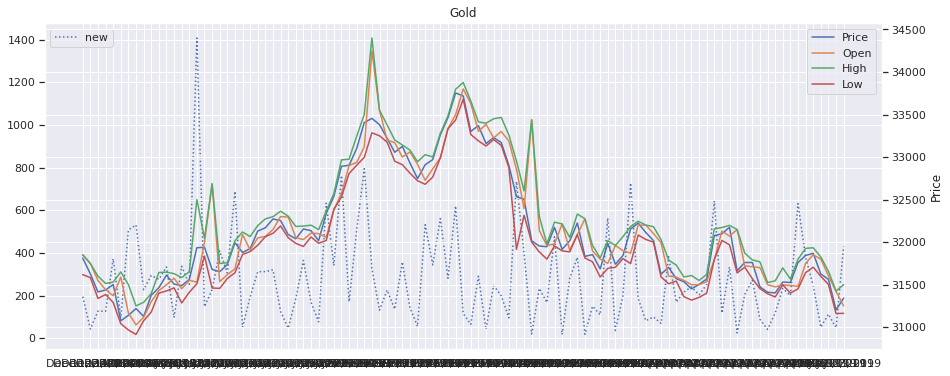

In [31]:
fig = plt.figure(figsize=[15, 6])
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax2.plot( df_test.Price, label='Price' ); 
ax2.plot( df_test.Open,  label='Open' );  
ax2.plot( df_test.High,  label='High' );  
ax2.plot( df_test.Low,   label='Low' );   
ax1.plot( df_test.new,  label='new', linestyle=':', );  

plt.title('Gold')
plt.ylabel('Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

(array([35., 30., 19.,  7.,  5.,  4.,  0.,  0.,  0.,  1.]),
 array([  18.18054691,  157.11873586,  296.05692481,  434.99511377,
         573.93330272,  712.87149168,  851.80968063,  990.74786958,
        1129.68605854, 1268.62424749, 1407.56243644]),
 <a list of 10 Patch objects>)

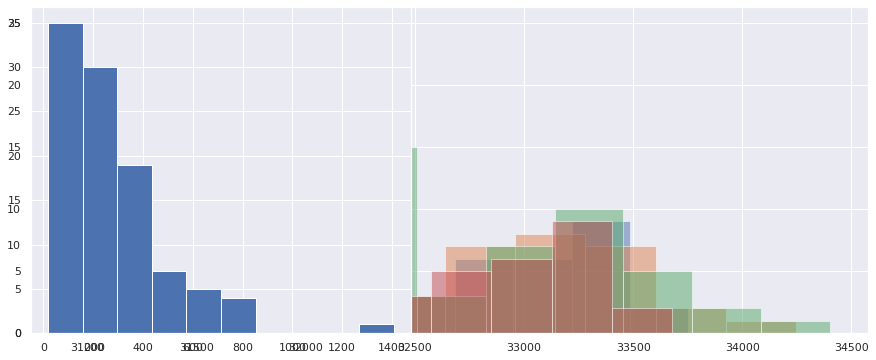

In [32]:
fig = plt.figure(figsize=[15, 6])
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(1, 2, 1)

ax1.hist( df_test.Price, alpha=0.5 )
ax1.hist( df_test.Open, alpha=0.5 )
ax1.hist( df_test.High, alpha=0.5 )
ax1.hist( df_test.Low, alpha=0.5 )
ax2.hist( df_test.new )

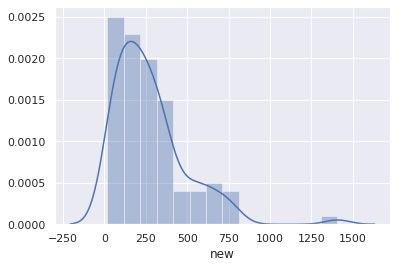

In [33]:

sns.set()
ax = sns.distplot(df_test.new)
plt.show()

**Description :**


*   "Pred" columns is a linear combination of the OHLC prices with varying coefficients
*   "new" column is a polynomial function of the same inputs.



## 3.2

In [0]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

In [0]:
infosys_df = pd.read_csv( '/content/drive/My Drive/DataScience/Aspiration Internship/week2.csv',  parse_dates=['Date'], index_col='Date' )
infosys_df = infosys_df[ infosys_df.Series == 'EQ' ]

In [36]:
infosys_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,vwap,PCT_change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,951.550000,0.000000,Slight or No change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,953.125077,0.003626,Slight or No change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,953.067084,-0.002304,Slight or No change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,955.934447,0.009393,Slight positive
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,956.233874,-0.003951,Slight or No change


In [0]:
nifty50 = pd.read_csv( '/content/drive/My Drive/DataScience/Aspiration Internship/Nifty50.csv',  parse_dates=['Date'], index_col='Date')

In [38]:
nifty50.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


**Import the stock of your choosing AND the Nifty index.Using linear regression (OLS), calculate -**

**3.2.1 : The daily Beta value for the past 3 months. (Daily= Daily returns)**

In [39]:
prices_df = pd.concat([ infosys_df['Close Price'], nifty50['Close'] ], axis=1)
prices_df.columns = ['infosys', 'nifty50']
prices_df.head()

,infosys,nifty50
Date,,
2017-05-15,951.55,9445.40
2017-05-16,955.00,9512.25
2017-05-17,952.80,9525.75
2017-05-18,961.75,9429.45
2017-05-19,957.95,9427.90


In [40]:
returns_df = prices_df.pct_change().dropna(axis=0)
returns_df.head()

,infosys,nifty50
Date,,
2017-05-16,0.003626,0.007078
2017-05-17,-0.002304,0.001419
2017-05-18,0.009393,-0.010109
2017-05-19,-0.003951,-0.000164
2017-05-22,0.003654,0.001098


In [41]:
X  = returns_df['nifty50']
Y  = returns_df['infosys']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                infosys   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     21.20
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.28e-06
Time:                        04:39:37   Log-Likelihood:                 1103.2
No. Observations:                 493   AIC:                            -2202.
Df Residuals:                     491   BIC:                            -2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.312      0.755      -0.003       0.002
nifty50        0.7451      0.162      4.604      0.000       0.427       1.063
==============================================================================
Omnibus:                      963.212   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1231550.455
Skew:                         -13.216   Prob(JB):                         0.00
Kurtosis:                     246.424   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Beta can also be calculated using the linear regression covarience coefficent.

Beta of INFOSYS vs NIFTY50 is **0.7451**

**3.2.2 : The monthly Beta value. (Monthly= Monthly returns)**

In [0]:
nifty50['month'] = nifty50.index.map(lambda date: f"{date.year}-{date.month}")
infosys_df['month'] = infosys_df.index.map(lambda date: f"{date.year}-{date.month}")

In [0]:
nifty50_monthly = nifty50.groupby('month').last()
infosys_df_monthly = infosys_df.groupby('month').last()


In [44]:
infosys_df_monthly.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,vwap,PCT_change,Trend
month,,,,,,,,,,,,,,,,,,
2017-10,INFY,EQ,944.10,925.00,930.00,920.00,922.00,921.85,924.74,4977494,4.602897e+09,68301,3547519,71.27,2017,931.858118,-0.023567,Negative
2017-11,INFY,EQ,982.70,989.45,989.45,968.35,972.50,976.10,978.17,8633472,8.445011e+09,126288,5893906,68.27,2017,969.989288,-0.006716,Slight negative
2017-12,INFY,EQ,1033.25,1030.10,1048.80,1030.00,1041.25,1042.05,1041.38,3300884,3.437462e+09,83693,2238793,67.82,2017,1011.833961,0.008517,Slight positive
2017-5,INFY,EQ,996.20,993.55,993.55,974.85,976.05,977.05,980.19,3881950,3.805051e+09,121323,3086038,79.50,2017,969.171663,-0.019223,Negative
2017-6,INFY,EQ,930.20,930.80,938.00,929.00,934.40,935.55,934.42,2108350,1.970090e+09,64325,1526984,72.43,2017,948.202546,0.005751,Slight positive


In [45]:
nifty50_monthly.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
month,,,,,,
2017-10,10364.90,10367.7,10323.95,10335.30,239809700,12830.06
2017-11,10332.70,10332.7,10211.25,10226.55,353105240,19005.56
2017-12,10492.35,10538.7,10488.65,10530.70,156736221,8943.10
2017-5,9636.55,9649.6,9609.25,9621.25,427053433,19605.94
2017-6,9478.50,9535.8,9448.75,9520.90,185202600,8783.59


In [46]:
returns_monthly = pd.concat([ infosys_df_monthly['Close Price'], nifty50_monthly['Close'] ], axis=1).pct_change().dropna()
returns_monthly.columns = ['infosys', 'nifty50']
returns_monthly.head()

,infosys,nifty50
month,,
2017-11,0.058849,-0.010522
2017-12,0.067565,0.029741
2017-5,-0.062377,-0.086362
2017-6,-0.042475,-0.010430
2017-7,0.080862,0.058419


In [47]:
X  = returns_monthly['nifty50']
Y  = returns_monthly['infosys']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                infosys   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.906
Date:                Fri, 15 May 2020   Prob (F-statistic):              0.102
Time:                        04:39:37   Log-Likelihood:                 4.0508
No. Observations:                  24   AIC:                            -4.102
Df Residuals:                      22   BIC:                            -1.745
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.044      0.146      0.885      -0.084       0.097
nifty50        1.5221      0.893      1.705      0.102      -0.330       3.374
==============================================================================
Omnibus:                       32.464   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.233
Skew:                           2.251   Prob(JB):                     1.72e-22
Kurtosis:                      11.943   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Monthly Beta value : **1.5221**

**DESCRIPTION :**


*   Daily β value of last 3 month is  0.7451, so it is less volatile than the market.

*   Monthly β value is 1.5221, so it is more volatile than the market
